In [32]:
import wfdb 
import neurokit2 as nk
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

**What the channels mean**

1. Channels = ECG leads
2. Each channel is the same heart activity recorded from a different physical viewpoint (electrode placement).
3. So MLII and V5 are two simultaneous “angles” on the same heartbeat, emphasizing different aspects of the signal.

| Symbol | Meaning |
|------|--------|
| N | Normal beat |
| V | Ventricular ectopic beat (PVC) |
| A | Atrial premature beat |
| + | Paced beat |


# LOAD DATA AND ANNOTATIONS

In [33]:
# try loading data
file_path = r"mit-bih-arrhythmia-database-1.0.0/100"
record = wfdb.rdrecord(file_path)  # no file extension

signal = record.p_signal        # numpy array (samples × channels)
fs = record.fs                  # sampling frequency
channels = record.sig_name      # lead names



# annotations
annotation = wfdb.rdann(file_path, "atr")

r_peaks = annotation.sample     # indices of beats
labels = annotation.symbol      # beat types (N, V, A, etc.)

print(f"Signal shape: {signal.shape}")
print(f"Sampling frequency: {fs}")
print(f"Channel names: {channels}")
print(f"Number of annotations: {len(r_peaks)}")
print(f"Annotation labels: {set(labels)}")


Signal shape: (650000, 2)
Sampling frequency: 360
Channel names: ['MLII', 'V5']
Number of annotations: 2274
Annotation labels: {'V', 'A', '+', 'N'}


#### INSPECT COUNT OF LABELS FOR PARTICIPANT

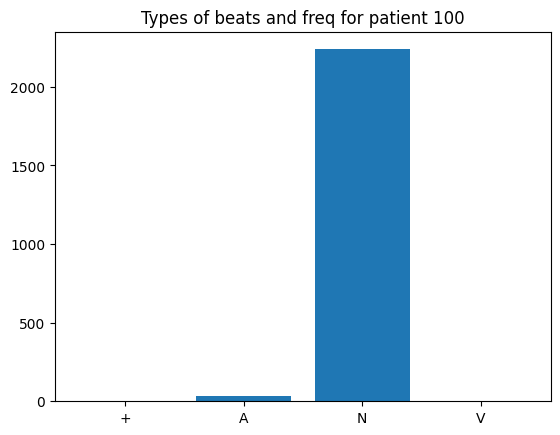

In [49]:
labels_arr = np.array(labels)
unique, counts = np.unique(labels_arr, return_counts=True)

plt.bar(unique, counts)
plt.title('Types of beats and freq for patient 100')
plt.show()


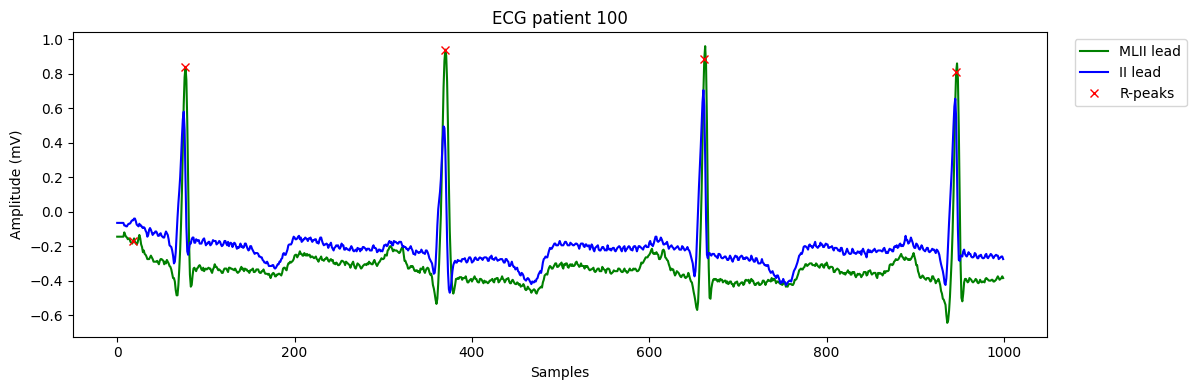

In [65]:
plt.figure(figsize=(12,4))
plt.plot(signal[:1000, 0], color='g',label='MLII lead')  # plot first 1000 samples 
plt.plot(signal[:1000, 1], color='b',label='II lead')  # plot first 1000 samples
plt.plot(r_peaks[r_peaks < 1000], signal[r_peaks[r_peaks < 1000], 0],'x',color='red',label='R-peaks')
plt.title('ECG patient 100')
plt.xlabel('Samples')
plt.ylabel('Amplitude (mV)')
plt.legend(bbox_to_anchor=(1.15, 1), loc='upper right')
plt.tight_layout()
plt.show()
